In [1]:
import pandas as pd
import numpy as np

In [5]:
path = "C:\\Users\\Aditya Shakya\\OneDrive\\Desktop\\datasets\\iris.data"

In [6]:
names = ['sepal-length',]

'C:\\Users\\Aditya Shakya\\OneDrive\\Desktop\\datasets\\iris.data'

In [7]:
names = ['sepal-length','sepal-width','petal-length','petal-width','Class']


In [8]:
iris_data = pd.read_csv(path,names = names)

In [9]:
iris_data.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
iris_data['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
X = iris_data.iloc[:,0:4].values
y = iris_data.iloc[:,-1].values

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

In [55]:
X_train.shape

(120, 4)

In [58]:
y_train.shape

(120,)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X_train

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
knn = KNeighborsClassifier(n_neighbors = k)

In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [63]:
y_pred = knn.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


In [66]:
acc = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    acc.append(accuracy_score(y_test,knn.predict(X_test)))

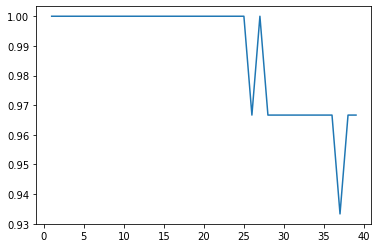

In [67]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),acc)
plt.show()

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [69]:
print(classification_report(y_test,y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [70]:
np.sqrt(X_train.shape[0])

10.954451150103322

In [75]:
def predict_output():
    sepal_length = float(input("Enter sepal length : "))
    sepal_width = float(input("Enter sepal width : "))
    petal_length = float(input("Enter petal length : "))
    petal_width = float(input("Enter petal width : "))
    X_new = np.array([[sepal_length],[sepal_width],[petal_length],[petal_width]]).reshape(1,4)
    X_new = scaler.transform(X_new)
    return knn.predict(X_new)

In [77]:
predict_output()[0]

Enter sepal length : 5.1
Enter sepal width : 3.5
Enter petal length : 1.4
Enter petal width : 0.2


'Iris-virginica'